In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with_discount = pd.read_csv("../data/discount.csv")

In [3]:
with_discount.head()

,Order ID,product ID,sales,Quantity,Discount,Profit
0,US-2013-126655,OFF-EN-10000761,18.840,2,0.4,-6.600
1,US-2013-126655,FUR-FU-10003066,308.280,7,0.4,-149.100
2,US-2013-126655,OFF-EN-10000075,40.176,2,0.4,-6.064
3,US-2013-126655,OFF-EN-10002226,8.784,3,0.4,-4.836
4,MX-2013-167759,FUR-CH-10002132,273.472,4,0.2,95.712


In [6]:
without_discount = pd.read_csv("../data/nodiscount.csv")

In [7]:
without_discount.head()

,Order ID,product ID,sales,Quantity,Discount,Profit
0,MX-2014-143658,OFF-LA-10002782,13.08,3,0,4.56
1,MX-2012-155047,FUR-FU-10004015,252.16,8,0,90.72
2,MX-2012-155047,FUR-BO-10002352,193.28,2,0,54.08
3,MX-2012-155047,OFF-BI-10004428,35.44,4,0,4.96
4,MX-2012-155047,OFF-AR-10004594,71.60,2,0,11.44


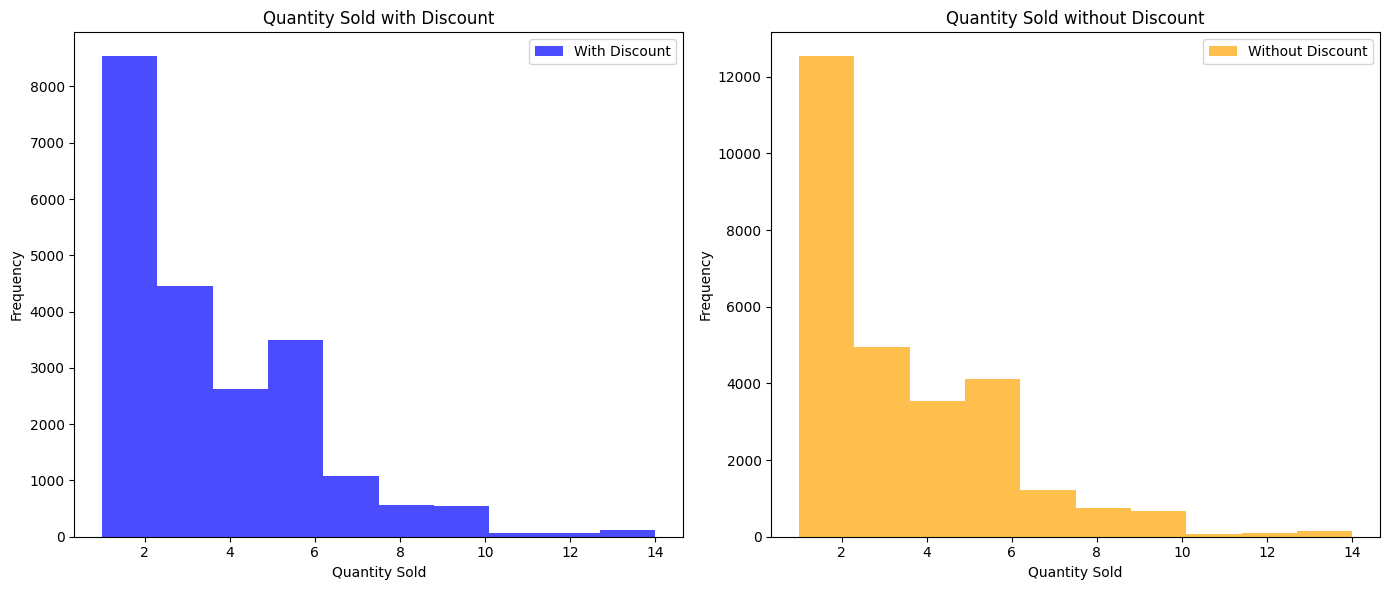

In [8]:
# Plotting side-by-side histograms for quantity of items sold with and without discount
plt.figure(figsize=(14, 6))

# Histogram for the group with discount
plt.subplot(1, 2, 1)
plt.hist(with_discount['Quantity'], alpha=0.7, bins=10, color='blue', label='With Discount')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.title('Quantity Sold with Discount')
plt.legend()

# Histogram for the group without discount
plt.subplot(1, 2, 2)
plt.hist(without_discount['Quantity'], alpha=0.7, bins=10, color='orange', label='Without Discount')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.title('Quantity Sold without Discount')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

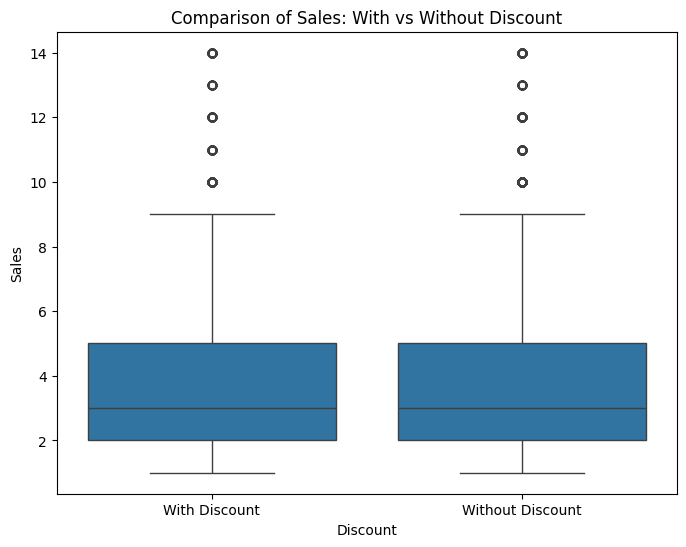

In [11]:
# Adding a column to indicate whether the sale has a discount or not
with_discount['discount'] = 'With Discount'
without_discount['discount'] = 'Without Discount'

# Merging the two dataframes
combined_sales = pd.concat([with_discount, without_discount])

# Plotting a boxplot to compare sales with and without discount
plt.figure(figsize=(8, 6))
sns.boxplot(x='discount', y='Quantity', data=combined_sales)
plt.title('Comparison of Sales: With vs Without Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


H0: There is no significant difference between the "With Discount" and "Without Discount" data.
H1: There is a significant difference between the "With Discount" and "Without Discount" data.

In [12]:
from scipy.stats import shapiro

# Performing the Shapiro-Wilk test for data with discount
stat_with, p_with = shapiro(with_discount['Quantity'])

# Performing the Shapiro-Wilk test for data without discount
stat_without, p_without = shapiro(without_discount['Quantity'])

# Printing the results of the test
print(f"Shapiro-Wilk test for With Discount: Stat={stat_with}, p-value={p_with}")
print(f"Shapiro-Wilk test for Without Discount: Stat={stat_without}, p-value={p_without}")

# Drawing conclusions based on p-value
if p_with < 0.05:
    print("The data for 'With Discount' is not normally distributed.")
else:
    print("The data for 'With Discount' is normally distributed.")

if p_without < 0.05:
    print("The data for 'Without Discount' is not normally distributed.")
else:
    print("The data for 'Without Discount' is normally distributed.")


Shapiro-Wilk test for With Discount: Stat=0.873135669134313, p-value=8.732014669759095e-84
Shapiro-Wilk test for Without Discount: Stat=0.8620312408838376, p-value=8.376934347178037e-92
The data for 'With Discount' is not normally distributed.
The data for 'Without Discount' is not normally distributed.


/home/L0L1P0P/.cache/pypoetry/virtualenvs/qbc8-superstore-6MLX7JUy-py3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21567.
  res = hypotest_fun_out(*samples, **kwds)
/home/L0L1P0P/.cache/pypoetry/virtualenvs/qbc8-superstore-6MLX7JUy-py3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28103.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
from scipy.stats import mannwhitneyu

# Performing the Mann-Whitney U test to compare the two groups
stat, p = mannwhitneyu(with_discount['Quantity'], without_discount['Quantity'])

# Printing the results of the test
print(f"Mann-Whitney U test: Stat={stat}, p-value={p}")

# Drawing conclusions based on p-value
if p < 0.05:
    print("There is a significant difference between 'With Discount' and 'Without Discount'.")
else:
    print("There is no significant difference between 'With Discount' and 'Without Discount'.")


Mann-Whitney U test: Stat=320990669.5, p-value=1.2366179467933793e-30
There is a significant difference between 'With Discount' and 'Without Discount'.
